In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import statistics

data={'Name':['A','B','C','D','E',' F'],           
      'Age':[12,17,22,18,24,30],
      'Gender':['M','M','M','M','F','F'],
      'Marks':[70,56,89,67,67,78],
      'PhD':['Y','Y','N','Y','N','Y']
      } 
df=pd.DataFrame(data)                      #k
df

,Name,Age,Gender,Marks,PhD
0,A,12,M,70,Y
1,B,17,M,56,Y
2,C,22,M,89,N
3,D,18,M,67,Y
4,E,24,F,67,N
5,F,30,F,78,Y


In [4]:
data2={'Name':['A','B','C','D','E','F'],
      'Age':[12,17,22,18,np.NaN,30],
      'Gender':['M','M','N/a','M','F','na'],
      'Marks':[70,56,89,np.nan,67,78],                #c
      'PhD':['Y','Y','N',15,'N',np.nan]
}
df2=pd.DataFrame(data2)
df2

,Name,Age,Gender,Marks,PhD
0,A,12.0,M,70.0,Y
1,B,17.0,M,56.0,Y
2,C,22.0,N/a,89.0,N
3,D,18.0,M,NaN,15
4,E,NaN,F,67.0,N
5,F,30.0,na,78.0,NaN


In [5]:
print (df2['Age'])
print(df2['Age'].isnull())                

0    12.0
1    17.0
2    22.0
3    18.0
4     NaN
5    30.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4     True
5    False
Name: Age, dtype: bool


In [6]:
print(df2['Gender'])
print(df2['Gender'].isnull())   #a

0      M
1      M
2    N/a
3      M
4      F
5     na
Name: Gender, dtype: object
0    False
1    False
2    False
3    False
4    False
5    False
Name: Gender, dtype: bool


In [7]:
print(df2['PhD'])    #1
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3     15
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3    False
4    False
5     True
Name: PhD, dtype: bool


In [8]:
cnt=0
for row in df2['PhD']:
  try:
    int(row)
    df2.loc[cnt,'PhD']=np.nan
  except ValueError:
    pass
  cnt+=1
print(df2['PhD'])
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3    NaN
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3     True
4    False
5     True
Name: PhD, dtype: bool


<Axes: xlabel='Age'>

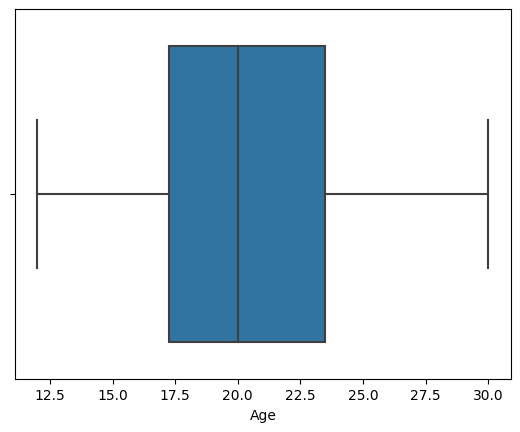

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Age'])

In [10]:
print(np.where(df['Age']>20))

(array([2, 4, 5], dtype=int64),)


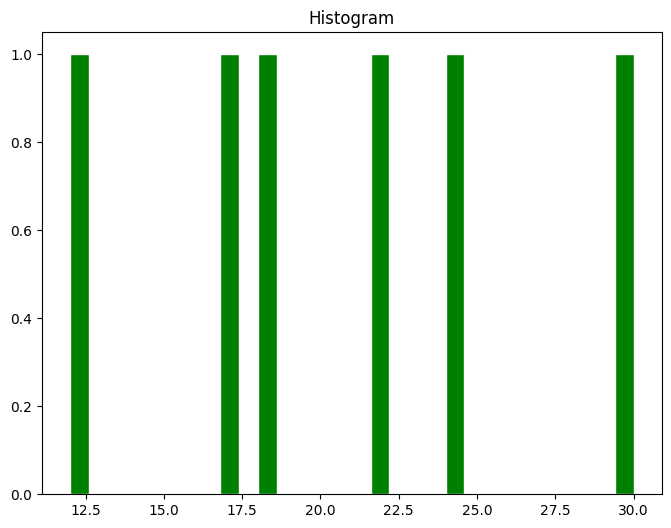

In [11]:
fig,x=plt.subplots(figsize=(8,6))
ax=plt.hist(df['Age'],bins=30,color='g',edgecolor='w')     #v
plt.title('Histogram') 
plt.show()

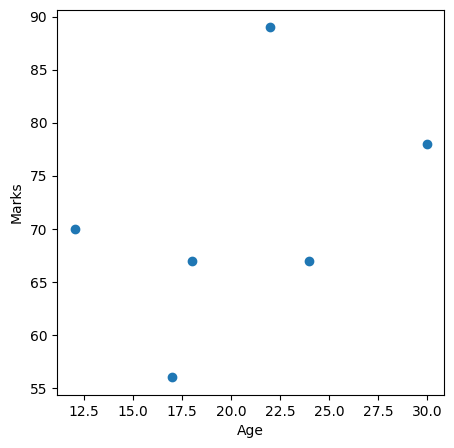

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df['Age'],df['Marks'])

#x-axis label
ax.set_xlabel('Age')

#y- axis label
ax.set_ylabel('Marks')
plt.show()

In [13]:
df['Log_Age']=np.log(df['Age'])
df

,Name,Age,Gender,Marks,PhD,Log_Age
0,A,12,M,70,Y,2.484907
1,B,17,M,56,Y,2.833213
2,C,22,M,89,N,3.091042
3,D,18,M,67,Y,2.890372
4,E,24,F,67,N,3.178054
5,F,30,F,78,Y,3.401197


<Axes: ylabel='Frequency'>

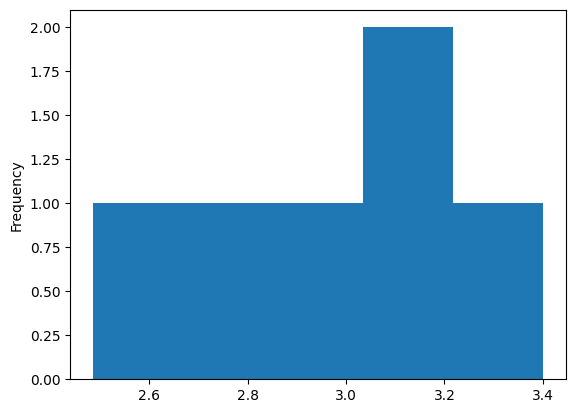

In [14]:
df['Log_Age'].plot.hist(bins=5)

In [15]:
df_scaled=df.copy()
col=['Age','Marks']
features=df_scaled[col]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled[col]=scaler.fit_transform(features.values)
df_scaled

,Name,Age,Gender,Marks,PhD,Log_Age
0,A,0.000000,M,0.424242,Y,2.484907
1,B,0.277778,M,0.000000,Y,2.833213
2,C,0.555556,M,1.000000,N,3.091042
3,D,0.333333,M,0.333333,Y,2.890372
4,E,0.666667,F,0.333333,N,3.178054
5,F,1.000000,F,0.666667,Y,3.401197
